Import Dataset and have a look at the columns

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel("ANZ_Virtual_Internship/Data/ANZ synthesised transaction dataset.xlsx", engine="openpyxl")

In [70]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [80]:
data["extraction"] = pd.to_datetime(data["extraction"])
data["ext_date"] = data["extraction"].dt.date

#### TASK: Create a summary dataset that has annual salary, and customer information

In [ ]:
data["merchant_suburb"].value_counts()

In [ ]:
df1 = data[data['movement']=='credit'].groupby(by = ["customer_id"]).sum()['amount']*4

In [ ]:
df1 = df1.to_frame()
df1.columns = ["annual_salary"]

In [ ]:
df2 = data[data['movement']=='debit'].groupby(by = ["customer_id"]).sum()['amount']
df2 = df2.to_frame()
df2.columns=["total_debit"]

In [ ]:
df = df1.join(df2)

Extract Customer ID, Date/time and debit amounts, -> Convert time-series-> Average Monthly Spending -> Plot into histogram -> Categorise and use as attribute.

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [101]:
df['montly_debit'] = df["total_debit"]/3

<AxesSubplot:ylabel='Frequency'>

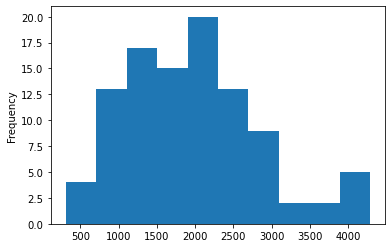

In [102]:
df['montly_debit'].plot.hist()

In [94]:
#df_ts["ext_date"] = pd.to_datetime(df_ts["ext_date"])

#TODO: Create bins and categorize spending

In [96]:
df_ts.groupby(
    [
        pd.Grouper(key = "ext_date", freq = "M"),
        pd.Grouper(key = "customer_id")
    ]
).mean()

amount
ext_date   customer_id              
2018-08-31 CUS-1005756958  49.076522
           CUS-1117979751  37.707317
           CUS-1140341822  45.480000
           CUS-1147642491  80.398800
           CUS-1196156254  37.778987
...                              ...
2018-10-31 CUS-72755508    81.031364
           CUS-809013380   64.044444
           CUS-860700529   31.864719
           CUS-880898248   32.910741
           CUS-883482547   37.602321

[299 rows x 1 columns]

In [ ]:
df1.columns=['customer_id', 'annual_salary']

In [ ]:
type(df1)

In [ ]:
data[data['movement']=='credit'][['account', 'amount', 'extraction']]

In [ ]:
data[data['movement']=='credit'][data['customer_id']=='CUS-1005756958']

In [ ]:
data[data['movement']=='credit'].groupby(by = ["customer_id"]).count()